Q-Learning dạng bảng
------------------------------------------

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

Tạo enviroment FrozenLake-v0, khởi tạo bảng **Q-table** kích thước 16x4 với giá trị ban đầu của tất cả các cell bằng 0

In [2]:
env = gym.make('FrozenLake-v0')
Q = np.zeros([16,4])

Cài đặt các thông số cho quá trình learning

In [3]:
lr = 0.8                         # Learning rate
y = 0.95                         # gamma, discount reward
num_episodes = 2000              # Number of episodes, or number of game
rList = []                       # List of accumulate reward over episode

Xây dựng hàm lựa chọn action từ bảng Q(s,a). Sử dụng thuật toán tham lam. Noise sẽ được giảm theo số episodes, đảm bảo explore nhiều những episodes đầu và exploit ở những episode sau.

In [4]:
def selectAction():
    noise = np.random.randn(1,4)*(1.0/(i+1)) 
    a = np.argmax(Q[s,:] + noise)
    return a

Cập nhật bảng **Q(s,a)** theo phương trình Bellman. Trong đó, $ \alpha $ là learing rate (lr), $ \gamma $ là hệ số discount reward (y):

$$Q(s,a) = Q(s,a) + \alpha [r + \gamma max_a Q(s',a') - Q(s,a)]$$

In [5]:
def updateQ(s,a,s1,r,lr,y):
    global Q
    Q[s,a] = Q[s,a] + lr*(r + y*np.max(Q[s1,:])-Q[s,a])  # s1,a1 <=> s',a'

Episode sẽ kết thúc nếu d==True, khi mà agent đạt tới vị trí Goal hoặc rơi xuống hố băng.
Episode cũng sẽ kết thúc nếu j=100, giúp chương trình không bị lặp vô hạn khi agent thực hiện các trạng thái lặp đi lặp lại.

In [7]:
if __name__ == '__main__':
    for i in range(num_episodes):
        s = env.reset()                    # Reset enviroment, return start state
        rAll = 0
        j = 0
        while j<100:
            a = selectAction()             # Select action
            s1,r,d,info = env.step(a)      # executable actions
            updateQ(s,a,s1,r,lr,y)         # update Q-table
            rAll += r                      # accumulate reward
            s = s1                         # update state
            if d==True:
                break
        rList.append(rAll)

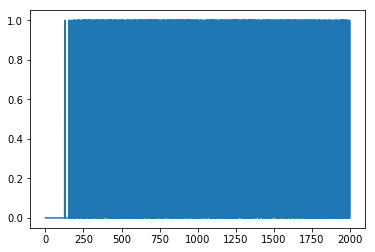

end


In [8]:
plt.plot(rList)
plt.show()
print ('end')

Biểu đồ trên cho thấy, số episode mà agent tới được vị trí Goal tăng dần trên toàn bộ 2000 episode